
#   <span style="color:rgb(255,102,102); text-align:center;"> BellaBeat Behavior Analysis </span> 
####  <span style="color:rgb(134, 0, 179); text-align:center;"> Analysing fitness tracking data for 33 FitBit users over a period of 31 days to guide BellaBeat's future marketing strategy.  </span>  
<br>
<br>

![Time that is Timeless!](https://bellabeat.com/wp-content/uploads/2021/09/time-functional.jpg)

<br>
<br>

## <span style="color:rgb(255,102,102);"> Introduction and background </span>
This R Markdown document sums up my user behavior analysis to help guide BellaBeat Marketing team to strategize on 
targeting the right consumer segment to boost their sales for one of their product, the smart watch called <span style="color:rgb(134, 0, 179);"><b>Time</b></span>

## <span style="color:rgb(255,102,102);"> Source file details </span>
I am using the following open source dataset in the form of CSV files that can be found at the link below:
https://www.kaggle.com/arashnic/fitbit
<br>
<span style="color:rgb(134, 0, 179);">
<b> Attention:</b> Although I find that the dataset is not ROCCC compliant, I am going ahead with the analysis for practice purposes.
</span>
<br>

The user fitness details being tracked by the FitBit application and tracker are as follows: 
<span style="color:rgb(134, 0, 179);"> 
* Activity level 
* Step count
* Distance 
* Sleep measurement: Time Asleep and Time on Bed
* Calories burnt
* Heartrate
</span>

These CSV files can be categorized based on the following levels of granularity: 
<span style="color:rgb(134, 0, 179);"> 
* Daily
* Hourly
* Minutes
* Seconds 
</span>
  
For my analysis, I would like to rollup the daily data into week level. I feel the minutes level and seconds level information for 
different users is too fine to help my analysis.
So I would be rolling up the minutes and seconds level to average it out to hourly data to find user behavior patterns.  

## <span style="color:rgb(255,102,102);"> Installing and loading the necessary packages and libraries </span>
For our purpose, we are using the following packages in R: 
<span style="color:rgb(134, 0, 179);"> 
* tidyverse - Basic package for data analysis
* lubridate - For date manipulation
* skimr & janitor - For data cleaning
* sqldf - For analysis using SQL commands on dataframe 
</span>

In [2]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
install.packages("sqldf")

library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)
library(dplyr)
library(sqldf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘p

## <span style="color:rgb(255,102,102);"> Loading the source files into R structures </span>
For my analysis I used spreadsheets to analyse Daily and Hourly data.
Minutes and Seconds level data are too huge to process in spreadsheets.
They have format issues to be loaded into SQL as well. I leveraged R to cleanup the minute level METs data.
I used R solely for analysing the seconds level data about heartrate.

Lets dig in!


In [7]:
heartrate_df <- read_csv("../input/heartrate-seconds-merged/heartrate_seconds_merged.csv")
colnames(heartrate_df)

Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Id"    "Time"  "Value"


## <span style="color:rgb(255,102,102);"> Cleaning the data </span>
I am fixing the date format for this dataset to <span style="color:rgb(134, 0, 179);"><b> datetime format<b> </span> and saving it into heartrate_df_clean dataframe.
Finally, I am converting ID from <span style="color:rgb(134, 0, 179);"><b>number to string field <b></span>help plot axis values in graph easily


In [8]:
heartrate_df_clean <- mutate(heartrate_df, Time_date = mdy_hms(Time))
head(heartrate_df_clean,4)

heartrate_df_clean <- select(heartrate_df_clean, -Time)
head(heartrate_df_clean,4)

heartrate_df_clean <- mutate(heartrate_df_clean, Id = as.character(Id))

skim_without_charts(heartrate_df_clean)

Id,Time,Value,Time_date
<dbl>,<chr>,<dbl>,<dttm>
2022484408,4/12/2016 7:21:00 AM,97,2016-04-12 07:21:00
2022484408,4/12/2016 7:21:05 AM,102,2016-04-12 07:21:05
2022484408,4/12/2016 7:21:10 AM,105,2016-04-12 07:21:10
2022484408,4/12/2016 7:21:20 AM,103,2016-04-12 07:21:20


Id,Value,Time_date
<dbl>,<dbl>,<dttm>
2022484408,97,2016-04-12 07:21:00
2022484408,102,2016-04-12 07:21:05
2022484408,105,2016-04-12 07:21:10
2022484408,103,2016-04-12 07:21:20


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,Id,0,1,10,10,0,14,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,Value,0,1,NA,NA,NA,NA,NA,77.32842,19.4045,36,63,73,88,203,NA,NA,NA,NA
3,POSIXct,Time_date,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12,2016-05-12 16:20:00,2016-04-26 20:28:50,961274


── Data Summary ────────────────────────
                           Values            
Name                       heartrate_df_clean
Number of rows             2483658           
Number of columns          3                 
_______________________                      
Column type frequency:                       
  character                1                 
  numeric                  1                 
  POSIXct                  1                 
________________________                     
Group variables            None              

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Id                    0             1  10  10     0       14          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean   sd p0 p25 p50 p75 p100
1 Value                 0             1 77.3 19.4 36  63  73  88  203



Once I check the summary statistics of the dataset, I proceed to check for data validity.
I cross verify the user IDs to see if they match with the parent dataset dailyActivity_merged as available my spreadsheet.
I loved experimenting the sql usage within the context of R using sqldf function.
There are multiple ways to do this, which is the <span style="color:rgb(134, 0, 179);"> *power of R!* </span>


In [9]:
sqldf("select count(distinct(ID)) from heartrate_df_clean")

sqldf("select distinct(ID) from heartrate_df_clean")

n_distinct(heartrate_df_clean$Id)


count(distinct(ID))
<int>
14


Id
<chr>
2022484408
2026352035
2347167796
4020332650
4388161847
4558609924
5553957443
5577150313
6117666160


[1] 14

## <span style="color:rgb(255,102,102);"> Housekeeping </span>
Given the dataset size, I proceed to cleanup the source dataframe to free up some memory for further analysis.


In [10]:
rm(heartrate_df)


## <span style="color:rgb(255,102,102);"> Analysing the data </span>

#### <span style="color:rgb(134, 0, 179);">Splitting the time </span>
Here I am splitting the time into individual components of year, month, day, weekday, hour, minute and seconds.
I'm sure there will be an efficient way to process this, but for beginner level, I find this good enough.


In [11]:
heartrate_df_clean <- mutate(heartrate_df_clean, Time_year = year(Time_date), Time_mon = month(Time_date), Time_dateNum = mday(Time_date), Time_week = wday(Time_date, label = TRUE), Time_hour = hour(Time_date), Time_min = minute(Time_date), Time_sec = second(Time_date))

glimpse(heartrate_df_clean)


Rows: 2,483,658
Columns: 10
$ Id           <chr> "2022484408", "2022484408", "2022484408", "2022484408", "…
$ Value        <dbl> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 6…
$ Time_date    <dttm> 2016-04-12 07:21:00, 2016-04-12 07:21:05, 2016-04-12 07:…
$ Time_year    <dbl> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 201…
$ Time_mon     <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ Time_dateNum <int> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1…
$ Time_week    <ord> Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tu…
$ Time_hour    <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, …
$ Time_min     <int> 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2…
$ Time_sec     <dbl> 0, 5, 10, 20, 25, 5, 10, 15, 20, 25, 35, 40, 50, 55, 0, 1…



## <span style="color:rgb(255,102,102);"> Visualize data </span>
Now we are ready to summarize the average heartbeat by user, day, hour and so on.
Heartbeat data gives a good indicator of the user's activity level. 

I am creating a <span style="color:rgb(134, 0, 179);">scatterplot </span>with different users to show <span style="color:rgb(134, 0, 179);">average heartrate per hour of the day</span>. 


`summarise()` has grouped output by 'Id', 'Time_mon', 'Time_dateNum'. You can
override using the `.groups` argument.


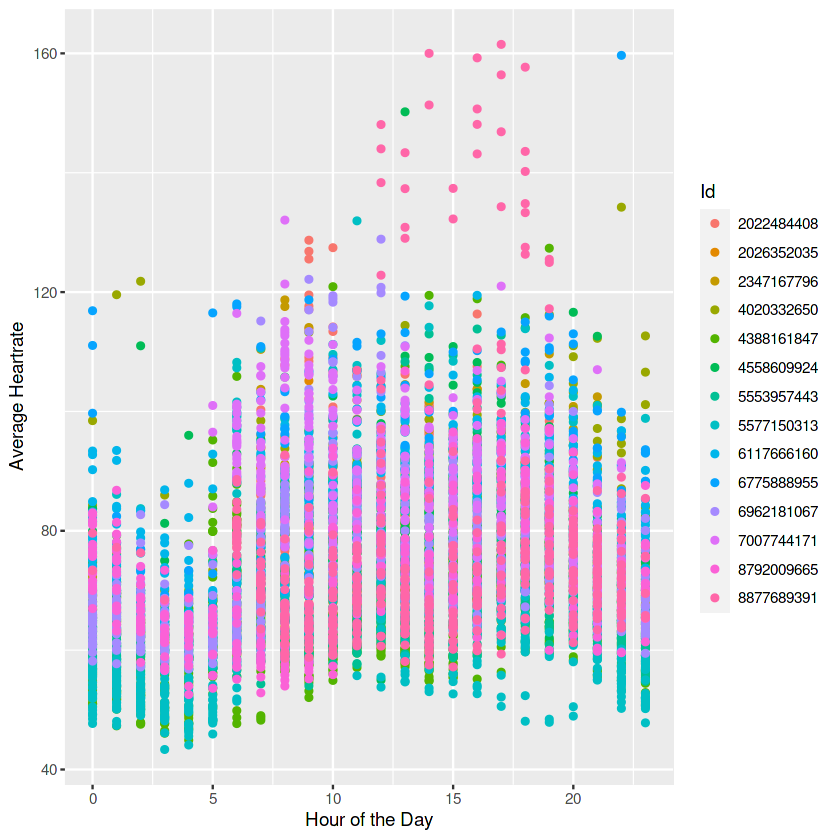

In [12]:
heartrate_df_clean %>%
  group_by(Id, Time_mon, Time_dateNum, Time_hour) %>%
  summarise(AvgHeartRate = mean(Value)) %>%
  ggplot(aes(x=Time_hour, y=AvgHeartRate, group = Id, color = Id)) + 
  geom_point() +
  labs(x= "Hour of the Day", y= "Average Heartrate")


#### <span style="color:rgb(134, 0, 179);">Analysis Result </span>

This shows which user is more active and which one is less active by the hour of the day.
After analysing the heartrate by users, we find the following:<br>
*  Approximately 10-15% of the users are active with more than 140 bpm.
* Those who are highly active during the later part of the day have a better quality of sleep signalled by lower heartrate below 60bpm.
* Users who have recorded high intensity activity through heartrate of more than 120 bpm plan their workouts between noon and 6 PM, which is lunch break and right after office.

Next I want to take the users as a whole and want to see the spread of heartrate across each day of the week.
This will tell us which days are more intense for the sample set and which hours are more intense on an average.
I do this by creating a heatmap as below.
I want to save this image as a pdf for later reference.


`summarise()` has grouped output by 'Time_week'. You can override using the
`.groups` argument.


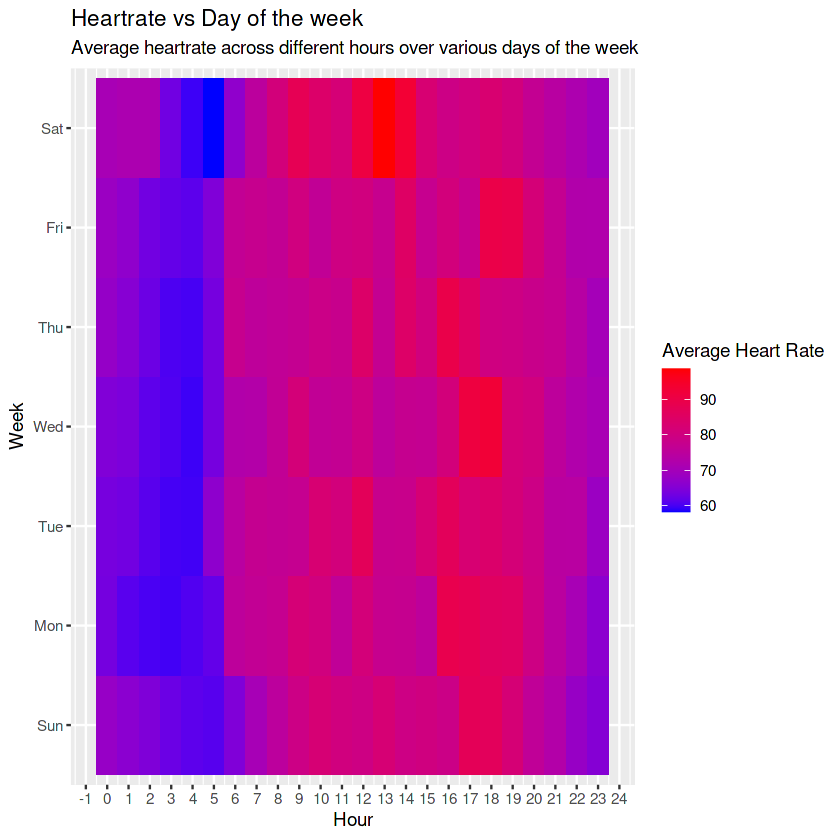

In [13]:
heartrate_df_clean %>%
  group_by( Time_week, Time_hour) %>%
  summarise(AvgHeartRate = mean(Value)) %>%
  ggplot(aes(x=Time_hour, y=Time_week, fill=AvgHeartRate)) + 
  geom_tile() +
  scale_fill_gradient(low="blue", high="red")+
  scale_x_continuous(breaks = scales::pretty_breaks(n=23))+
  labs(x = "Hour", y= "Week", 
       title="Heartrate vs Day of the week", 
       subtitle ="Average heartrate across different hours over various days of the week",
       fill = "Average Heart Rate")

ggsave("Heartrate_Weekday.pdf", device = "pdf", width = 8, height = 10, units = "in" )


#### <span style="color:rgb(134, 0, 179);">Analysis Result </span> 
* The heartrate heatmap shows that the average user in the sample set are early risers with lowest heartrate between 12 -5AM
* Their week starts slowly with Sunday to Tuesday being lower activity as compared to the second half of the week.
* During the workweek, their favorite workout time is between 4-7PM 
* On Tuesdays, they seem to push the high intensity workout during lunch break.
* On weekends they like to workout late on Friday between 5:30-8PM.
* On Saturday, they wake up late by and workout during noon, probably before a brunch.
* Sundays are relatively relaxed.

## <span style="color:rgb(255,102,102);"> Conclusion </span>
Based on the analysis, the user group seems to be <span style="color:rgb(134, 0, 179);"><b> office goers with desk jobs </b></span>. They are <span style="color:rgb(134, 0, 179);"><b>highly motivated and follow a set routine </b></span>in their life.
They are <span style="color:rgb(134, 0, 179);"><b>committed to wellness </b></span>and have the discipline to workout through out the week.

I recommend the following marketing strategy to improve customer base:
   <span style="color:rgb(134, 0, 179);"> <b>
* Target the population with these characteristics through corporate events and tie-ups.
* Social media as a preferred medium to reach out to this segment of population.
* Population with relatively lighter family responsibilities like young singles or those with matured kids.
* Selling point for the singles population could be attractive looks through wellness while those in the later age could be stress management and better quality of sleep.</b> </span>
